## LaGuardia Flight Delays (May/June 2009)
This notebook explores the flight delay data (explained below). First, we start by viewing the data graphically, and start to answer questions about the data.

In [72]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

# Settings
plt.style.use("ggplot")

#### Read Data
The flight daly data is from the GitHub repo (https://github.com/lchihara/MathStatsResamplingR) from the book *Mathematical Statisticsc with Resampling and R* (Chihara, Hesterberg).

This dataset contains flight departure information from LaGuardia airport during May and June 2009 for United Airlines and American Airlines.

In [73]:
# Read data
flight_delays = pd.read_csv("../Data/FlightDelays.csv")

# Metadata
print(flight_delays.head())
print(flight_delays.describe())

   ID Carrier  FlightNo Destination DepartTime  Day Month  FlightLength  \
0   1      UA       403         DEN      4-8am  Fri   May           281   
1   2      UA       405         DEN     8-Noon  Fri   May           277   
2   3      UA       409         DEN      4-8pm  Fri   May           279   
3   4      UA       511         ORD     8-Noon  Fri   May           158   
4   5      UA       667         ORD      4-8am  Fri   May           143   

   Delay Delayed30  
0     -1        No  
1    102       Yes  
2      4        No  
3     -2        No  
4     -3        No  
                ID     FlightNo  FlightLength        Delay
count  4029.000000  4029.000000   4029.000000  4029.000000
mean   2015.000000   827.103500    185.301067    11.737900
std    1163.216446   551.309387     41.787826    41.630495
min       1.000000    71.000000     68.000000   -19.000000
25%    1008.000000   371.000000    155.000000    -6.000000
50%    2015.000000   691.000000    163.000000    -3.000000
75%    302

#### Dataset Exploration
First, we explore the dataset graphically. We view the departure time bar chart, and the flight length and delay histograms.

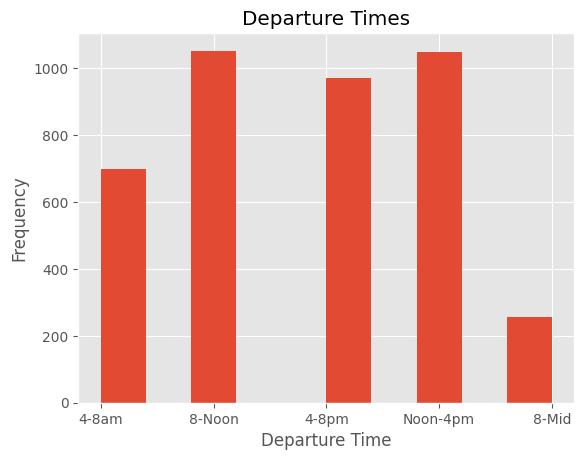

In [74]:
plt.hist(flight_delays["DepartTime"])
plt.title("Departure Times")
plt.ylabel("Frequency")
plt.xlabel("Departure Time")
plt.show()

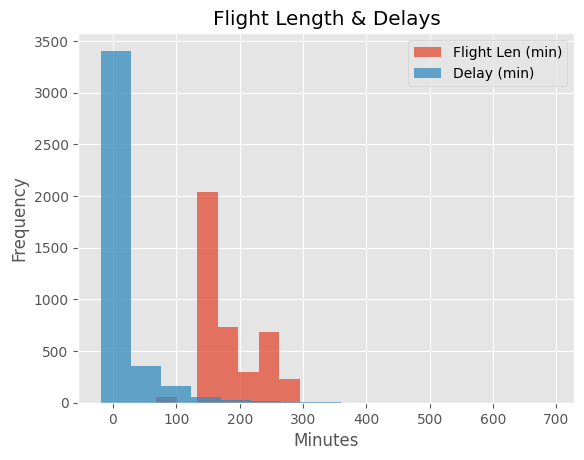

In [91]:
plt.hist(flight_delays["FlightLength"], label="Flight Len (min)", alpha=0.75, bins=7)
plt.hist(flight_delays["Delay"], label="Delay (min)", alpha=0.75, bins=15)
plt.legend()
plt.title("Flight Length & Delays")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

#### Day of Week and 30-Minute Delay Relationship
This section explores the relationship between the day of the week and percentage of flights delayed by at least 30 minutes.

In [92]:
contingency_table = pd.crosstab(
    flight_delays["Day"],
    flight_delays["Delayed30"]
)
contingency_table["pct. delayed"] = contingency_table["Yes"] / contingency_table.sum(axis=1)


print(contingency_table)

Delayed30   No  Yes  pct. delayed
Day                              
Fri        493  144      0.226060
Mon        569   61      0.096825
Sat        406   47      0.103753
Sun        507   44      0.079855
Thu        434  132      0.233216
Tue        535   93      0.148089
Wed        488   76      0.134752


The two days with the hightest percetnage of flights delayed by at least 30 minutes are Thursday(~23.3%) and Friday(~22.6%).

#### Relationhip Between Delayed Filghts and Flight Length
The next section of the analysis looks at the relationship between flight delays and flight lengths.

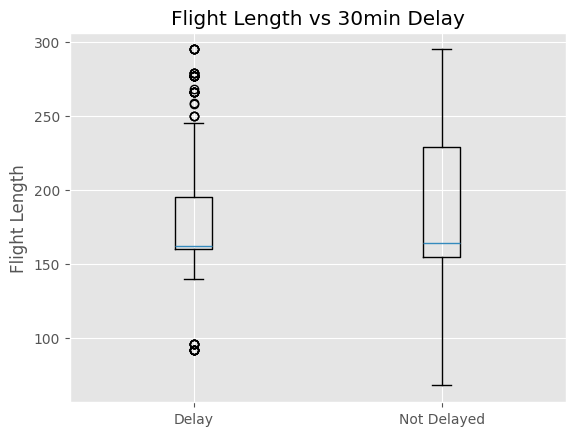

In [93]:
# Get flight length of delayed flights
flight_delayed = flight_delays.loc[
    flight_delays["Delayed30"] == "Yes", "FlightLength"
]
# Get flight length of non-delayed flights
flight_nondelayed = flight_delays.loc[
    flight_delays["Delayed30"] == "No", "FlightLength"
]

# Create box plots
fig, ax = plt.subplots()
ax.boxplot(
    [flight_delayed, flight_nondelayed]
)

ax.set_title("Flight Length vs 30min Delay")
ax.set_xticklabels(["Delay", "Not Delayed"])
ax.set_ylabel("Flight Length")
plt.show()

From the box-plot above, it appears that flights that are delayed at least 30 minutes appear to be concentrated between flight lengths of 150 and 200 minutes (with additional outliers). The non-delayed flights have a greater flight length spread. The medians of flight lengths are similar for delayed and non-delayed flights. This suggests there is no significant relationship between the length of the flight and whether or not is was delayed by at least 30 minutes.